> # (Gemstone) 1인 가구의 최적 원룸 입지 추천을 위한 K-Means

## Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib import font_manager, rc
%matplotlib inline
#%matplotlib notebook
matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스 기호도 표시

import folium

from sklearn import datasets

# 한글 깨짐 방지 목적 #
font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family = font_name)

# 경고 메시지 생략
import warnings
warnings.filterwarnings(action='ignore')

## 데이터

In [2]:
data = pd.read_csv('Data/dataset.csv', encoding='cp949')
data.columns = [
                '경도', '위도', 
                'CCTV', 'Subway', 'Accident', 'Travel', 'Estate', 'Service',
                'Retail', 'Hotel', 'Sports', 'Food', 'Medical', 'Education'
               ]
data.index = range(len(data))
data.head()

,경도,위도,CCTV,Subway,Accident,Travel,Estate,Service,Retail,Hotel,Sports,Food,Medical,Education
0,126.764484,37.451463,0,3,7,0,0,0,0,0,0,0,0,0
1,126.764484,37.501463,0,7,112,0,0,0,0,0,0,0,0,0
2,126.764484,37.551463,0,2,4,0,0,5,2,0,0,0,0,0
3,126.764484,37.601463,0,0,1,0,0,0,0,0,0,0,0,0
4,126.764484,37.651463,0,4,34,0,0,0,0,0,0,0,0,0


## 관심 지역 위치 확인 - (서울특별시 신림동 부근)

In [3]:
loclist = [list(i) for i in zip(data['위도'], data['경도'])]

m = folium.Map(location = [37.581306, 126.972694], zoom_start=10)
for j in loclist:
    folium.Marker(j).add_to(m)
m

In [4]:
data.columns

Index(['경도', '위도', 'CCTV', 'Subway', 'Accident', 'Travel', 'Estate', 'Service',
       'Retail', 'Hotel', 'Sports', 'Food', 'Medical', 'Education'],
      dtype='object')

## Features

In [5]:
#feature = data[['Sepal length','Sepal width','Petal length','Petal width']]

feature = data[data.columns[2:]]

feature.head()

,CCTV,Subway,Accident,Travel,Estate,Service,Retail,Hotel,Sports,Food,Medical,Education
0,0,3,7,0,0,0,0,0,0,0,0,0
1,0,7,112,0,0,0,0,0,0,0,0,0
2,0,2,4,0,0,5,2,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0
4,0,4,34,0,0,0,0,0,0,0,0,0


## Modeling

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model = KMeans(n_clusters=3,algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature, predict],axis=1)
result = pd.concat([data, predict],axis=1)

print(r)

    CCTV  Subway  Accident  Travel  Estate  Service  Retail  Hotel  Sports  \
0      0       3         7       0       0        0       0      0       0   
1      0       7       112       0       0        0       0      0       0   
2      0       2         4       0       0        5       2      0       0   
3      0       0         1       0       0        0       0      0       0   
4      0       4        34       0       0        0       0      0       0   
5      0       0         0       0       0        0       0      0       0   
6    150       5        13      30      49      221     276      1       0   
7    292       9        18     259     299     1495    2041     25       7   
8     14       2         0       0       1        5       9      0       0   
9      0       4        11       0       0        0       0      0       0   
10    10       0         7       4       9       63      83      0       0   
11   981       8        71     324     437     2372    3357     

## 예측된 클러스터에 따른 페어플롯

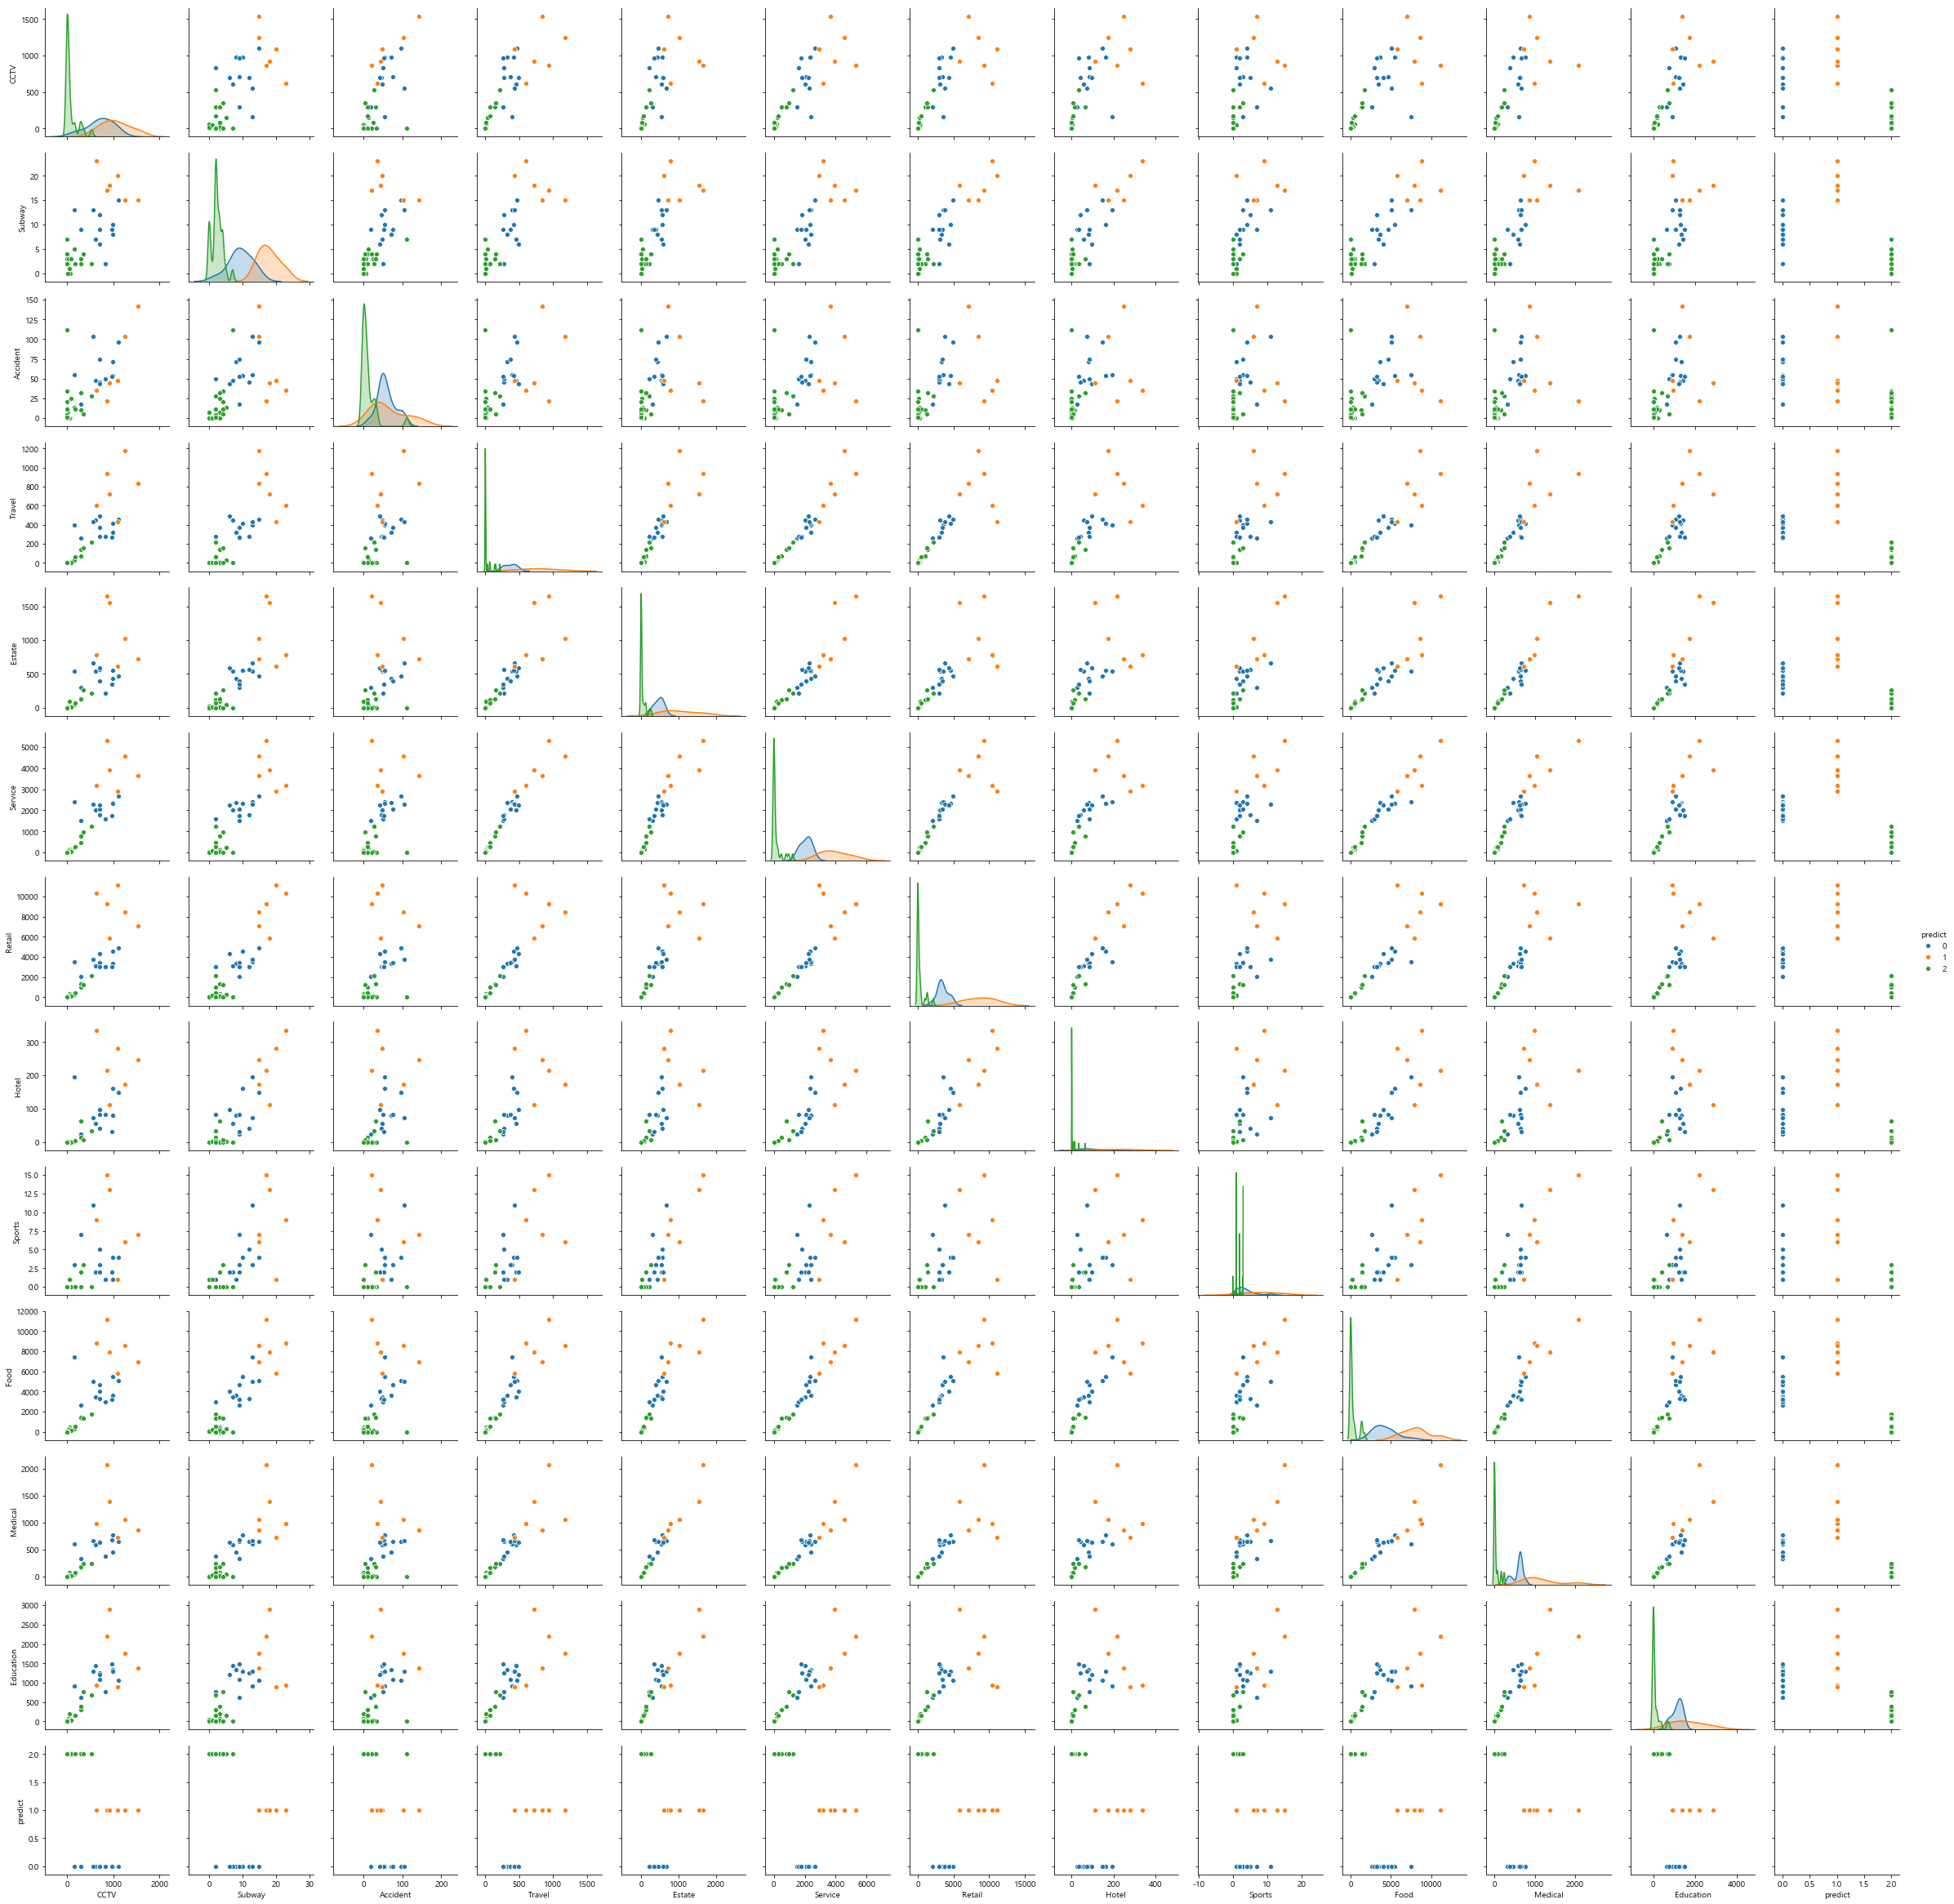

In [7]:
#pairplot with Seaborn
sns.pairplot(r,hue='predict')
plt.show()

## 3차원 시각화

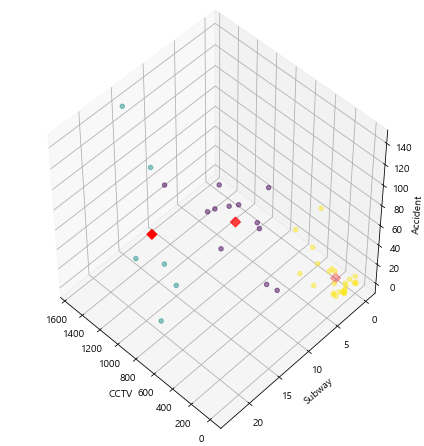

In [8]:
# centers = pd.DataFrame(model.cluster_centers_,columns=['Sepal length','Sepal width','Petal length','Petal width'])
# center_x = centers['Sepal length']
# center_y = centers['Sepal width']
# center_z = centers['Petal length']

centers = pd.DataFrame(model.cluster_centers_,columns=data.columns[2:])
center_x = centers['CCTV']
center_y = centers['Subway']
center_z = centers['Accident']


from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['CCTV'],r['Subway'],r['Accident'],c=r['predict'],alpha=0.5)
ax.scatter(center_x,center_y,center_z,s=50,marker='D',c='r')
ax.set_xlabel('CCTV')
ax.set_ylabel('Subway')
ax.set_zlabel('Accident')
plt.show()

## 클러스터 별 특성

In [9]:
data.head()

,경도,위도,CCTV,Subway,Accident,Travel,Estate,Service,Retail,Hotel,Sports,Food,Medical,Education
0,126.764484,37.451463,0,3,7,0,0,0,0,0,0,0,0,0
1,126.764484,37.501463,0,7,112,0,0,0,0,0,0,0,0,0
2,126.764484,37.551463,0,2,4,0,0,5,2,0,0,0,0,0
3,126.764484,37.601463,0,0,1,0,0,0,0,0,0,0,0,0
4,126.764484,37.651463,0,4,34,0,0,0,0,0,0,0,0,0


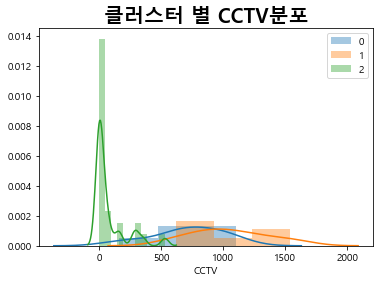

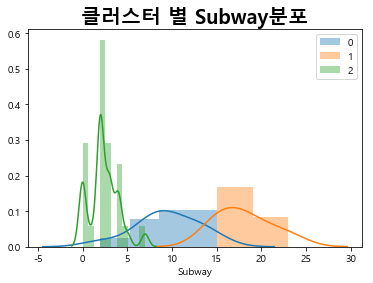

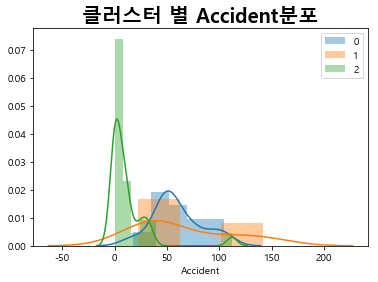

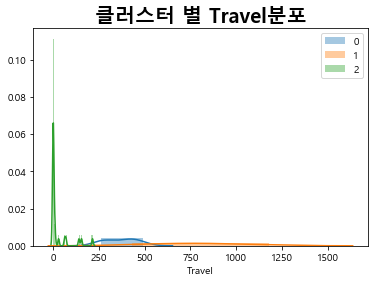

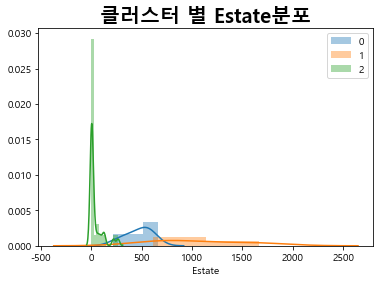

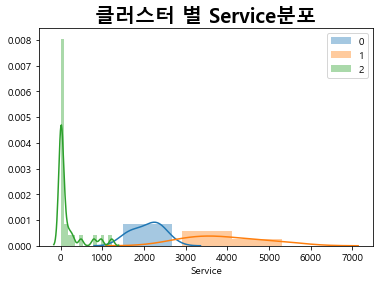

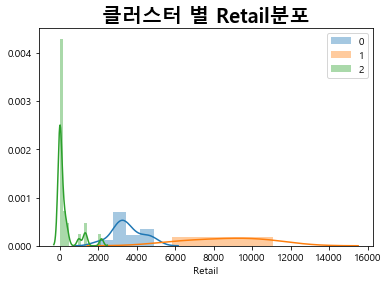

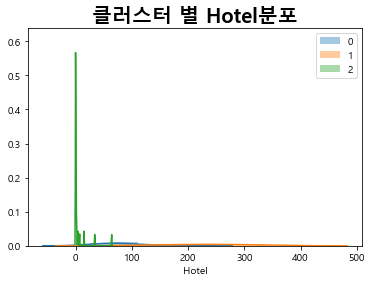

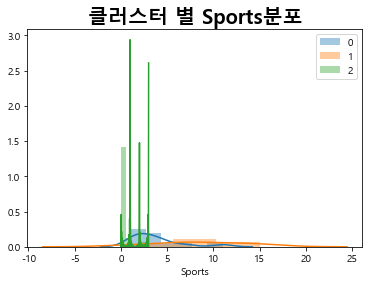

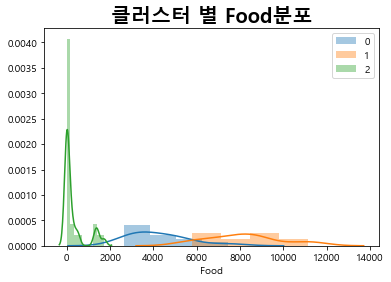

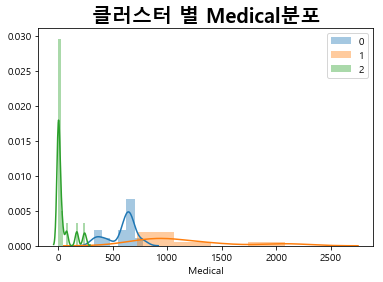

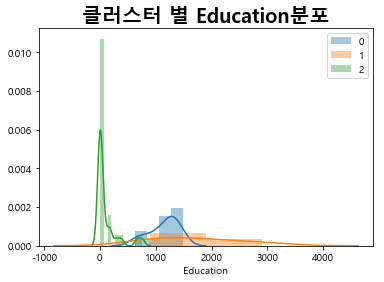

In [10]:
for var in data.columns[2:] : 

    plt.title('클러스터 별 ' + var + '분포', weight='bold', size=20)
    for i in range(3):
        sns.distplot(r[r['predict'] == i][var], label=str(i))
    plt.legend(loc = 'upper right')
    plt.show()

## 지도 위에서 클러스터를 확인해보자

In [11]:
result

,경도,위도,CCTV,Subway,Accident,Travel,Estate,Service,Retail,Hotel,Sports,Food,Medical,Education,predict
0,126.764484,37.451463,0,3,7,0,0,0,0,0,0,0,0,0,2
1,126.764484,37.501463,0,7,112,0,0,0,0,0,0,0,0,0,2
2,126.764484,37.551463,0,2,4,0,0,5,2,0,0,0,0,0,2
3,126.764484,37.601463,0,0,1,0,0,0,0,0,0,0,0,0,2
4,126.764484,37.651463,0,4,34,0,0,0,0,0,0,0,0,0,2
5,126.814484,37.451463,0,0,0,0,0,0,0,0,0,0,0,0,2
6,126.814484,37.501463,150,5,13,30,49,221,276,1,0,297,37,155,2
7,126.814484,37.551463,292,9,18,259,299,1495,2041,25,7,2628,326,627,0
8,126.814484,37.601463,14,2,0,0,1,5,9,0,0,14,1,6,2
9,126.814484,37.651463,0,4,11,0,0,0,0,0,0,0,0,0,2


In [12]:
loclist_0 = [list(i) for i in zip(result[result['predict']==0]['위도'], result[result['predict']==0]['경도'])]
loclist_1 = [list(i) for i in zip(result[result['predict']==1]['위도'], result[result['predict']==1]['경도'])]
loclist_2 = [list(i) for i in zip(result[result['predict']==2]['위도'], result[result['predict']==2]['경도'])]

m = folium.Map(location = [37.581306, 126.972694], zoom_start=10)

for j in loclist_0:
    folium.CircleMarker(j,color='blue', fill_color='blue').add_to(m)

for j in loclist_1:
    folium.CircleMarker(j,color='yellow', fill_color='yellow').add_to(m)

for j in loclist_2:
    folium.CircleMarker(j,color='green', fill_color='green').add_to(m)

    
m